# 球谐变换 Spherical Harmonic Transform

## 1. 准备自变量

In [1]:
%matplotlib inline
#%matplotlib notebook

import scipy.special as sp
import numpy as np
import pkuplot
import matplotlib.pyplot as plt
from matplotlib import cm, colors, rc
from mpl_toolkits.mplot3d import Axes3D

Nlon = 128
Nlat = Nlon/2

lon   = np.linspace(0,2*np.pi,Nlon)
lat   = np.linspace(-np.pi/2,np.pi/2,Nlat)
colat = np.linspace(0,np.pi,Nlat)

print("\n=== Lat ===")
print("colat 的维度是：",colat.shape)
print("colat=\n",colat)

# 二维化
colat2d, lon2d = np.meshgrid(colat, lon)

print("\n=== Co-Lat(2d) ===")
print("colat2d 的维度是：",colat2d.shape)
print("colat2d[0,:]=\n",colat2d[0,:])

# The Cartesian coordinates of the unit sphere
x = np.sin(colat2d) * np.cos(lon2d)
y = np.sin(colat2d) * np.sin(lon2d)
z = np.cos(colat2d)


=== Lat ===
colat 的维度是： (64,)
colat=
 [ 0.          0.04986655  0.0997331   0.14959965  0.1994662   0.24933275
  0.2991993   0.34906585  0.3989324   0.44879895  0.4986655   0.54853205
  0.5983986   0.64826515  0.6981317   0.74799825  0.7978648   0.84773135
  0.8975979   0.94746445  0.997331    1.04719755  1.0970641   1.14693065
  1.1967972   1.24666375  1.2965303   1.34639685  1.3962634   1.44612995
  1.4959965   1.54586305  1.5957296   1.64559615  1.6954627   1.74532925
  1.7951958   1.84506235  1.8949289   1.94479545  1.994662    2.04452855
  2.0943951   2.14426165  2.1941282   2.24399475  2.2938613   2.34372785
  2.3935944   2.44346095  2.4933275   2.54319405  2.5930606   2.64292715
  2.6927937   2.74266025  2.7925268   2.84239335  2.8922599   2.94212645
  2.991993    3.04185955  3.0917261   3.14159265]

=== Co-Lat(2d) ===
colat2d 的维度是： (128, 64)
colat2d[0,:]=
 [ 0.          0.04986655  0.0997331   0.14959965  0.1994662   0.24933275
  0.2991993   0.34906585  0.3989324   0.44879895 

## 2. 球谐变换

Python中的球谐变换参考：https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.sph_harm.html

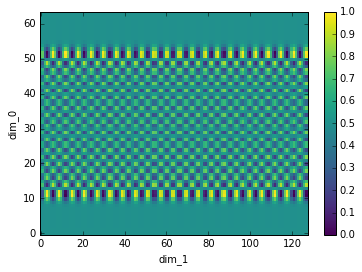

In [19]:
m, n = 21, 42

# Calculate the spherical harmonic Y_n^m (n-degree, m-order)
sh = sp.sph_harm(m, n, lon2d, colat2d)

# 归一化
fcolors_real = sh.real
fcolors_imag = sh.imag
fcolors_real = (fcolors_real - fcolors_real.min())/(fcolors_real.max() - fcolors_real.min())
fcolors_imag = (fcolors_imag - fcolors_imag.min())/(fcolors_imag.max() - fcolors_imag.min())

# Quick view
pkuplot.quickview_array(fcolors_real.T)

## 3. Plotting

绘图程序参考：
https://scipython.com/book/chapter-8-scipy/examples/visualizing-the-spherical-harmonics/

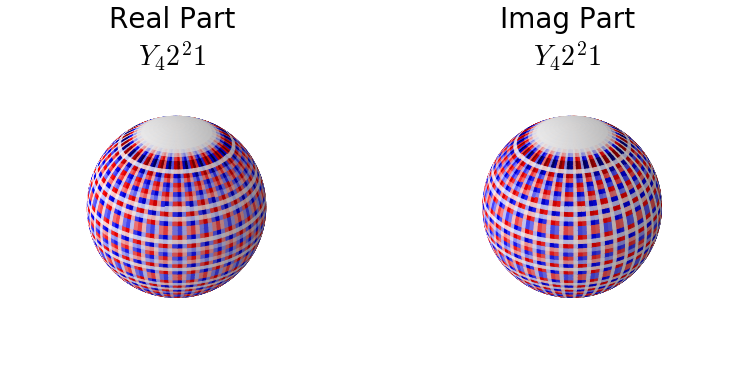

In [20]:
fig = plt.figure(figsize=(13,6))

ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x,y,z, rstride=1,cstride=1, facecolors=cm.seismic(fcolors_real))
plt.title('Real Part\n$Y_%d^%d$'%(n,m),fontsize=28)
ax.set_axis_off()

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x,y,z, rstride=1,cstride=1, facecolors=cm.seismic(fcolors_imag))
plt.title('Imag Part\n$Y_%d^%d$'%(n,m),fontsize=28)
ax.set_axis_off()

plt.show()